# Predict Loan Eligibility for Standard Bank


# Project Description:

In this project, we will be using both traditional and automated machine learning modules to assess the creditworthiness of loan applicants. Our goal is to implement a model that can accurately predict whether a potential borrower will default on their loan or not. By the end of the project, we will determine which approach is better suited for solving business problems.

# Problem Statement: 

implementing a model that will predict if the potential borrower will default on his/her loan or not.

The Home Loans Department manager wants to know the following:

1. An overview of the data. (HINT: Provide the number of records, fields and their data types. Do for both).

2. What data quality issues exist in both train and test? (HINT: Comment any missing values and duplicates)

3. How do the the loan statuses compare? i.e. what is the distrubition of each?

4. How do women and men compare when it comes to defaulting on loans in the historical dataset?

5. How many of the loan applicants have dependents based on the historical dataset?

6. How do the incomes of those who are employed compare to those who are self employed based on the historical dataset? 

7. Are applicants with a credit history more likely to default than those who do not have one?

8. Is there a correlation between the applicant's income and the loan amount they applied for? 


# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [2]:
train = pd.read_csv('https://cdn.theforage.com/vinternships/companyassets/kkKXfgG5FckTX8Toc/gGduJCSFY4fqkCYvn/1653086357170/train.csv')
test = pd.read_csv('https://cdn.theforage.com/vinternships/companyassets/kkKXfgG5FckTX8Toc/gGduJCSFY4fqkCYvn/1653086237854/test.csv')

#train = pd.read_csv('Train_dataset_Applicants details.csv')
#test = pd.read_csv('Test dataset_Applicants details')

train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# STEP 1: Data Pre- Processing

# a) Finding the Missing Value Features

In [3]:
# Join both the train and test dataset
train['source']='train'
test['source']='test'

dataset = pd.concat([train,test], ignore_index = True)
print("Train dataset shape:",train.shape)
print("Test dataset shape:",test.shape)
print("Concatenated dataset shape:",dataset.shape)

Train dataset shape: (614, 14)
Test dataset shape: (367, 13)
Concatenated dataset shape: (981, 14)


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  source             981 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 107.4+ KB


In [5]:
dataset.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
source                 0
dtype: int64

In [6]:
print(dataset['Gender'].unique())
print(dataset['Married'].unique())
print(dataset['Dependents'].unique())
print(dataset['Self_Employed'].unique())
print(dataset['LoanAmount'].unique())
print(dataset['Loan_Amount_Term'].unique())
print(dataset['Credit_History'].unique())

['Male' 'Female' nan]
['No' 'Yes' nan]
['0' '1' '2' '3+' nan]
['No' 'Yes' nan]
[ nan 128.  66. 120. 141. 267.  95. 158. 168. 349.  70. 109. 200. 114.
  17. 125. 100.  76. 133. 115. 104. 315. 116. 112. 151. 191. 122. 110.
  35. 201.  74. 106. 320. 144. 184.  80.  47.  75. 134.  96.  88.  44.
 286.  97. 135. 180.  99. 165. 258. 126. 312. 136. 172.  81. 187. 113.
 176. 130. 111. 167. 265.  50. 210. 175. 131. 188.  25. 137. 160. 225.
 216.  94. 139. 152. 118. 185. 154.  85. 259. 194.  93. 370. 182. 650.
 102. 290.  84. 242. 129.  30. 244. 600. 255.  98. 275. 121.  63. 700.
  87. 101. 495.  67.  73. 260. 108.  58.  48. 164. 170.  83.  90. 166.
 124.  55.  59. 127. 214. 240.  72.  60. 138.  42. 280. 140. 155. 123.
 279. 192. 304. 330. 150. 207. 436.  78.  54.  89. 143. 105. 132. 480.
  56. 159. 300. 376. 117.  71. 490. 173.  46. 228. 308. 236. 570. 380.
 296. 156. 103.  45.  65.  53. 360.  62. 218. 178. 239. 405. 148. 190.
 149. 153. 162. 230.  86. 234. 246. 500. 186. 119. 107. 209. 208. 243

# b) replacing missing data with substituted values
<b>Out of the features with missing NaN values, the missing values in 'Loan_Status' are the Values that need to be predicted by our model. Hence, we need not impute the NaN values in Loan_Status column.
    
1) Missing values in Integer and Float dtype columns are replaced by their median 
    
2) Missing values in Object dtype columns are replaced by their mode</b>

In [7]:
dataset['Gender'].fillna(dataset['Gender'].mode()[0], inplace=True)
dataset['Married'].fillna(dataset['Married'].mode()[0], inplace=True)
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0], inplace=True)
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0], inplace=True)
dataset['LoanAmount'].fillna(dataset['LoanAmount'].median(), inplace=True)
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].median(), inplace=True)
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0], inplace=True)

In [8]:
dataset.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
source                 0
dtype: int64

# Spliting the train and test set again after replacing all missing values

In [9]:
#Divide into test and train:
train = dataset.loc[dataset['source']=="train"]
test = dataset.loc[dataset['source']=="test"]
#Drop unnecessary columns:
test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

C:\Users\dines\AppData\Local\Temp\ipykernel_2860\2114946786.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['source'],axis=1,inplace=True)
C:\Users\dines\AppData\Local\Temp\ipykernel_2860\2114946786.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['source'],axis=1,inplace=True)


In [10]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Step 2: Data Visualization


<b> Visualizing Loan_Status </b>

<AxesSubplot:title={'center':'Loan Status Bar Plot'}, xlabel='Loan Status Y - Yes or N- No', ylabel='Loan Status Count'>

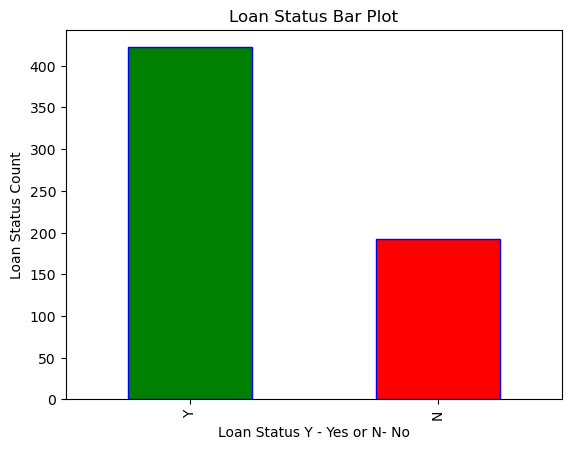

In [11]:
plt.title('Loan Status Bar Plot')
plt.xlabel('Loan Status Y - Yes or N- No')
plt.ylabel('Loan Status Count')

train['Loan_Status'].value_counts().plot.bar(color=['green', 'red'],edgecolor='blue')

<b> Study of categorical features like Gender, Married, Self_Employed and Credit_History </b>

<AxesSubplot:title={'center':'Credit History'}>

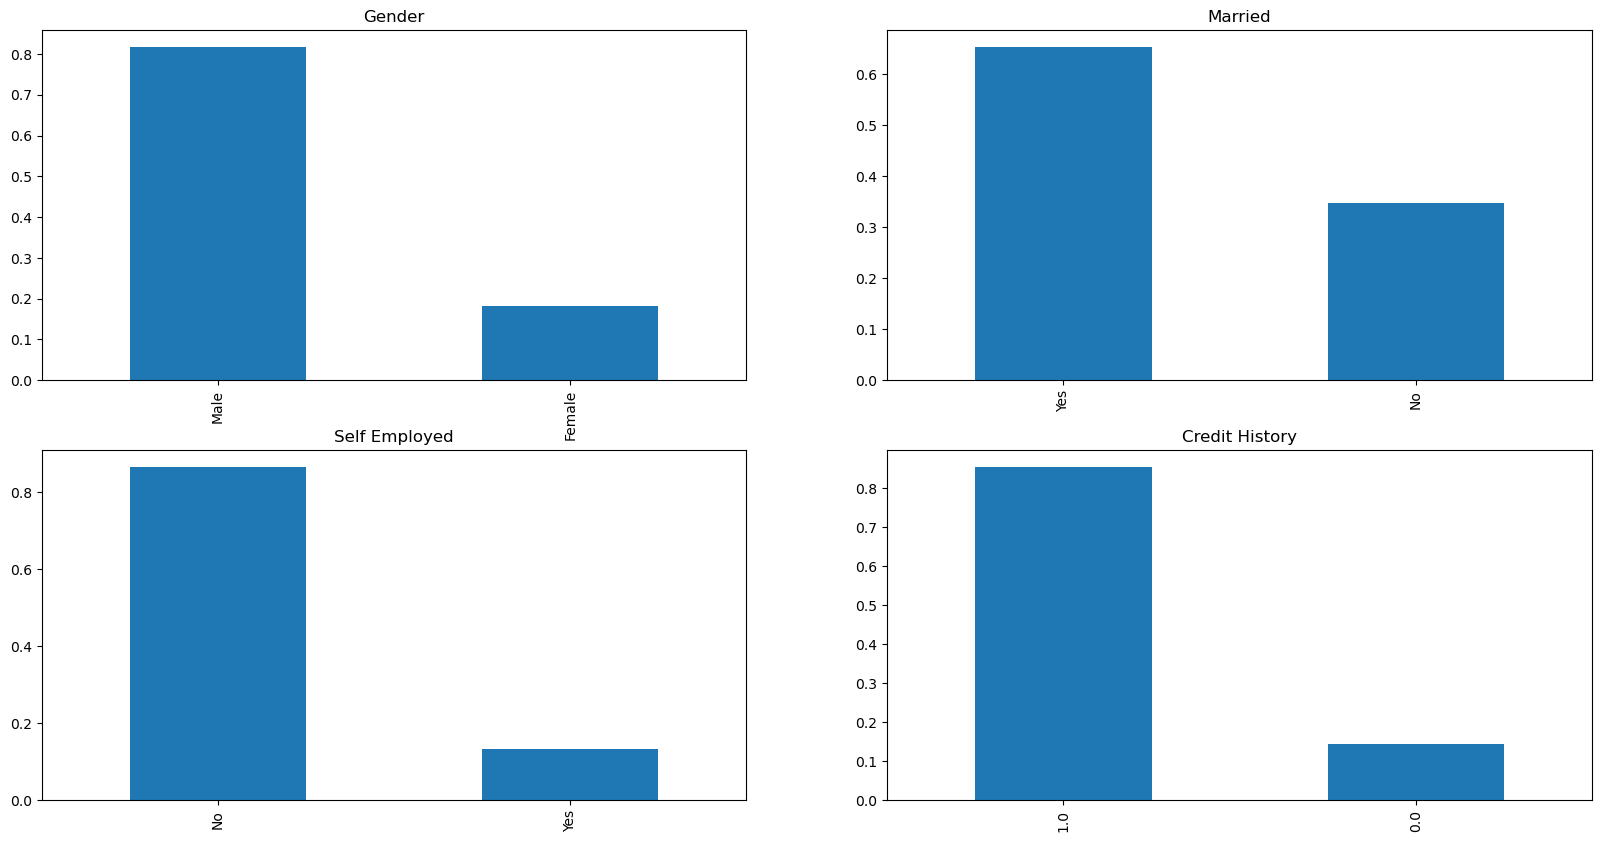

In [12]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.subplot(2,2,2)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(2,2,3)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self Employed')
plt.subplot(2,2,4)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit History')

<b> Categorical Independent Variable vs Target Variable </b>

<AxesSubplot:xlabel='Credit_History'>

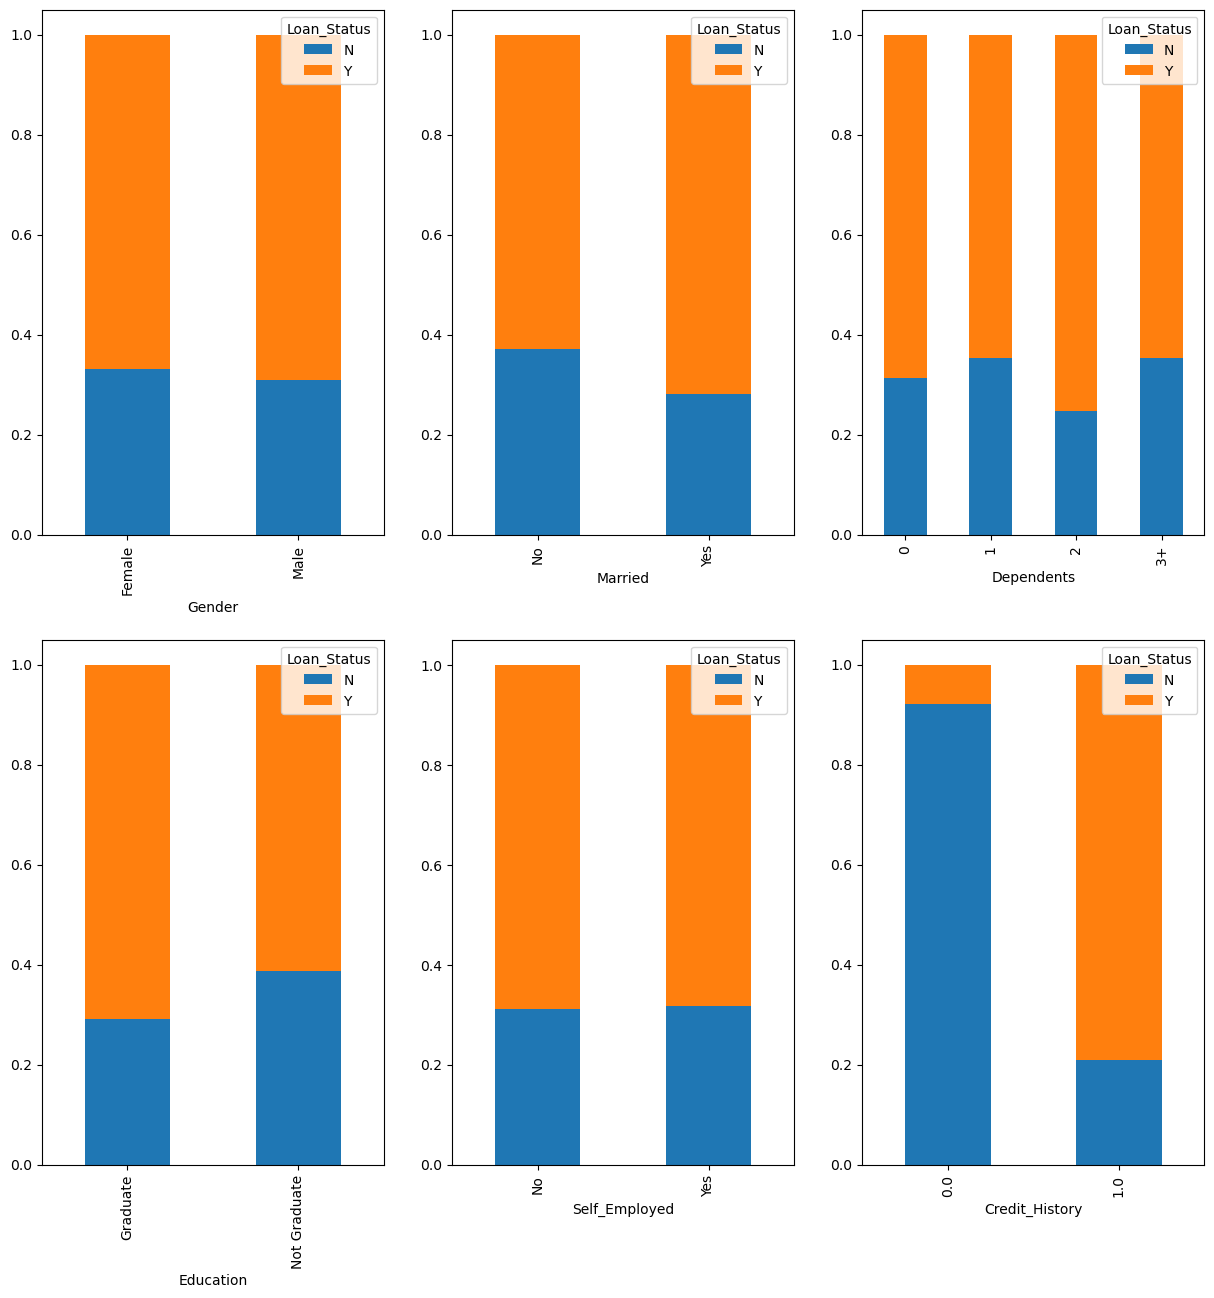

In [13]:
fig, ax = plt.subplots(2,3,figsize = (15,15))
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax[0,0])

Married = pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[0,1])

Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[0,2])

Education = pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=ax[1,0])

Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[1,1])

Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[1,2])


# STEP 3 : Converting the categorical data into numerical data appropriately
<b> scikit-learn only accepts numerical variables. Hence, we need to convert all categorical variables into numeric types.


I am not using LabelEncoder() because this method proved to give very less Accuracy when compared to get_dummies() method</b>

In [14]:
X=train.drop(["Loan_Status",'Loan_ID'],axis=1)
y=train["Loan_Status"]

X = pd.get_dummies(X,drop_first=True)
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,126.0,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1


# Before getting into model building we can solve the management Questions by using our analytical konwledge that are performed in the above

1. An overview of the data. (HINT: Provide the number of records, fields and their data types. Do for both).

            Our Dataset has 13 Columns and 981 entries. Each field having its own datatype, they are shown in below 
                 0   Loan_ID            981 non-null    object 
                 1   Gender             957 non-null    object 
                 2   Married            978 non-null    object 
                 3   Dependents         956 non-null    object 
                 4   Education          981 non-null    object 
                 5   Self_Employed      926 non-null    object 
                 6   ApplicantIncome    981 non-null    int64  
                 7   CoapplicantIncome  981 non-null    float64
                 8   LoanAmount         954 non-null    float64
                 9   Loan_Amount_Term   961 non-null    float64
                 10  Credit_History     902 non-null    float64
                 11  Property_Area      981 non-null    object 
                 12  Loan_Status        614 non-null    object 
                dtypes: float64(4), int64(1), object(8)
                memory usage: 107.3+ KB
                
            The below are the statistical discription about our home loan dataset,
                      ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History
                count       981.000000         981.000000  954.000000        961.000000   902.000000
                mean       5179.795107        1601.916330  142.511530        342.201873   0.835920
                std        5695.104533        2718.772806   77.421743         65.100602   0.370553
                min           0.000000           0.000000    9.000000          6.000000   0.000000
                25%        2875.000000           0.000000  100.000000        360.000000   1.000000
                50%        3800.000000        1110.000000  126.000000        360.000000   1.000000
                75%        5516.000000        2365.000000  162.000000        360.000000   1.000000
                max       81000.000000       41667.000000  700.000000        480.000000   1.000000

2. What data quality issues exist in both train and test? (HINT: Comment any missing values and duplicates)

      In our given dataset, It doesn't have any duplicate values. But it contains 600 missing values.They are in the below mentioned fields. In our testing dataset there is no Loan_Status column.i.e.367 blanks.
        
        Field wise missing data Count,
                Gender                24
                Married                3
                Dependents            25
                Self_Employed         55
                LoanAmount            27
                Loan_Amount_Term      20
                Credit_History        79
    
3. How do the the loan statuses compare? i.e. what is the distrubition of each?
                 
      Loan_status based on applicants Credit_History is shown in the count plot. If the applicants have Credit_History equals to 1. They have much more probability to get a loan compared to applicants those who are having Credit_History 0.
  
         The overall Loan statuses with their respective applicants count,
                 
                Y    422
                N    192
              Name: Loan_Status, dtype: int64
              
    
4. How do women and men compare when it comes to defaulting on loans in the historical dataset?
         
      In this dataset, there are 37 defaultes loans among women and 150 defaulted loans among men. The default rate is 33.0% for women and 30.7% for men 
                Loan_Status    N    Y  Default_Rate
                Gender                             
                Female        37   75      0.330357
                Male         150  339      0.306748       
5. How many of the loan applicants have dependents based on the historical dataset?

      There are 411 loan applicants have dependents based on the historical dataset. Below are the applicats count with respect to dependents. 
                0     545
                1     160
                2     160
                3+     91
                Name: Dependents, dtype: int64

6. How do the incomes of those who are employed compare to those who are self employed based on the historical dataset? 

      In our dataset, the average income for employed individuals(those who are not self employed) is 4892.03 and the average income for self employed individuals is 6912.58.
                Self_Employed
                No     4892.030979
                Yes    6912.579832
                Name: ApplicantIncome, dtype: float64

7. Are applicants with a credit history more likely to default than those who do not have one?

      In our dataset, there are 97 loan applicants with a credit history who were approved for a loan, and 378 of them defaulted, resulting in a defaulted percentage of 79.58%. On other hand, there are 82 loan applicants without a credit histry who were approved for a loan, and 7 of them defaulted, resulting in a defaulted percentage of 7.87%.
                Loan_Status      N    Y  Default_Rate
                Credit_History                       
                0.0             82    7      7.865169
                1.0             97  378     79.578947

8. Is there a correlation between the applicant's income and the loan amount they applied for?
        
      There is a Positive or storngly Positive Correlation between the applicant's income and the loan amount they applied. Because of the Correlation Coefficient between two variables are 0.5518108565650452



# Train/Test Split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

# Step 4: Fitting the dataset to various models
# 1) Logistic Regression

In [16]:
logistic_Regression = LogisticRegression()
logistic_Regression.fit(x_train,y_train)

LogisticRegression()

In [17]:
y_pred = logistic_Regression.predict(x_test)

In [18]:
log = accuracy_score(y_pred,y_test)*100

In [19]:
print(confusion_matrix(y_pred,y_test))

[[ 24   3]
 [ 27 131]]


In [20]:
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           N       0.47      0.89      0.62        27
           Y       0.98      0.83      0.90       158

    accuracy                           0.84       185
   macro avg       0.72      0.86      0.76       185
weighted avg       0.90      0.84      0.86       185

0.8378378378378378


# 2) Naive-Bayes

In [21]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [22]:
pred_gnb = gnb.predict(x_test)

In [23]:
GNB = accuracy_score(pred_gnb,y_test)*100

In [24]:
print(confusion_matrix(pred_gnb,y_test))

[[ 22   4]
 [ 29 130]]


In [25]:
print(classification_report(pred_gnb,y_test))
print(accuracy_score(pred_gnb,y_test))

              precision    recall  f1-score   support

           N       0.43      0.85      0.57        26
           Y       0.97      0.82      0.89       159

    accuracy                           0.82       185
   macro avg       0.70      0.83      0.73       185
weighted avg       0.89      0.82      0.84       185

0.8216216216216217


# 3) SVM

In [26]:
svc = SVC()
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)

In [27]:
SVC = accuracy_score(pred_svc,y_test)*100

In [28]:
print(confusion_matrix(pred_svc,y_test))

[[  0   0]
 [ 51 134]]


In [29]:
print(classification_report(pred_svc,y_test))

              precision    recall  f1-score   support

           N       0.00      0.00      0.00         0
           Y       1.00      0.72      0.84       185

    accuracy                           0.72       185
   macro avg       0.50      0.36      0.42       185
weighted avg       1.00      0.72      0.84       185



C:\Users\dines\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dines\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dines\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 4) Decision Tree - Entropy

In [30]:
dtree_en = DecisionTreeClassifier(criterion='entropy',splitter='random',max_leaf_nodes=5,min_samples_leaf=10,max_depth=3)

In [31]:
clf = dtree_en.fit(x_train,y_train)

In [32]:
pred_dt = clf.predict(x_test)

In [33]:
DTREE = accuracy_score(pred_dt,y_test)*100

In [34]:
cm=confusion_matrix(y_test,pred_dt)
print(cm)
print(classification_report(y_test,pred_dt))

[[ 21  30]
 [  2 132]]
              precision    recall  f1-score   support

           N       0.91      0.41      0.57        51
           Y       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185



# 5) Decision Tree - Gini

In [35]:
dtree = DecisionTreeClassifier(criterion='gini',splitter='random',max_leaf_nodes=5,min_samples_leaf=10,max_depth=5)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=5, min_samples_leaf=10,
                       splitter='random')

In [36]:
pred_g = dtree.predict(x_test)

In [37]:
DTREE_G = accuracy_score(y_test,pred_g)*100

In [38]:
cm=confusion_matrix(y_test,pred_g)
print(cm)
print(classification_report(y_test,pred_g))

[[ 21  30]
 [  2 132]]
              precision    recall  f1-score   support

           N       0.91      0.41      0.57        51
           Y       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185



# 6) Random Forest

In [39]:
rfc = RandomForestClassifier(criterion='entropy',n_estimators=400)
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=400)

In [40]:
pred_rf= rfc.predict(x_test)

In [41]:
RFC = accuracy_score(y_test,pred_rf)*100
RFC

79.45945945945945

In [42]:
print(confusion_matrix(pred_rf,y_test))

[[ 21   8]
 [ 30 126]]


In [43]:
print(classification_report(pred_rf,y_test))

              precision    recall  f1-score   support

           N       0.41      0.72      0.53        29
           Y       0.94      0.81      0.87       156

    accuracy                           0.79       185
   macro avg       0.68      0.77      0.70       185
weighted avg       0.86      0.79      0.82       185



# 7) AdaBoost (Entropy-Decision Tree)

In [44]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=1,random_state=0)
adaboost = AdaBoostClassifier(n_estimators=80, base_estimator=model,random_state=0)
adaboost.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=1,
                                                         random_state=0),
                   n_estimators=80, random_state=0)

In [45]:
pred = adaboost.predict(x_test)

In [46]:
ada = accuracy_score(y_test,pred)*100

# 8) AdaBoost (Gini-Decision Tree)

In [47]:
model_g = DecisionTreeClassifier(criterion='gini',max_depth=1,random_state=0)
adaboost1 = AdaBoostClassifier(n_estimators=90, base_estimator=model_g,random_state=0)
adaboost1.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=0),
                   n_estimators=90, random_state=0)

In [48]:
pred_gini = adaboost.predict(x_test)

In [49]:
g = accuracy_score(y_test,pred_gini)*100

In [50]:
print("1)  Logistic Regression    :",log)
print("2)  AdaBoost - Entropy     :",ada)
print("3)  AdaBoost - Gini        :",g)
print("4)  Decision Tree - Entropy:",DTREE)
print("5)  Decision Tree - Gini   :",DTREE_G)
print("6)  Random Forest          :",RFC)
print("7)  Naive-Bayes            :",GNB)
print("8) SVC                    :",SVC)

1)  Logistic Regression    : 83.78378378378379
2)  AdaBoost - Entropy     : 81.62162162162161
3)  AdaBoost - Gini        : 81.62162162162161
4)  Decision Tree - Entropy: 82.70270270270271
5)  Decision Tree - Gini   : 82.70270270270271
6)  Random Forest          : 79.45945945945945
7)  Naive-Bayes            : 82.16216216216216
8) SVC                    : 72.43243243243244


# Step 5: Deciding Best Fit Model

<b> 
    
    1)  Logistic Regression    : 83.78 %
       
    2)  Decision Tree - Entropy: 82.70 %
    
    3)  Decision Tree - Gini   : 82.70 %
    
    4)  Naive-Bayes            : 82.16 %
    
    5)  AdaBoost - Entropy     : 81.62 %
    
    6)  AdaBoost - Gini        : 81.62 %
    
    7)  Random Forest          : 78.37 %
  
    8) SVC                     : 72.43 % 
    
The best fit model for the given dataset is: <b>LOGISTIC REGRESSION</b>

# STEP 6: Predicting the values of Loan_Status for the data given in test.csv

In [51]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
614,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,NaN
615,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,NaN
616,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,NaN
617,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,1.0,Urban,NaN
618,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,NaN


# Applying the Logistic Regression Model to the test dataset

In [52]:
Xt = test.drop(["Loan_Status","Loan_ID"],axis=1)
Xt = pd.get_dummies(Xt,drop_first=True)

Xt.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
614,5720,0.0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1
615,3076,1500.0,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1
616,5000,1800.0,208.0,360.0,1.0,1,1,0,1,0,0,0,0,1
617,2340,2546.0,100.0,360.0,1.0,1,1,0,1,0,0,0,0,1
618,3276,0.0,78.0,360.0,1.0,1,0,0,0,0,1,0,0,1


In [53]:
test_pred = logistic_Regression.predict(Xt)

In [54]:
test["Loan_Status"] = test_pred

C:\Users\dines\AppData\Local\Temp\ipykernel_2860\272257932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Loan_Status"] = test_pred


In [55]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
614,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,Y
615,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,Y
616,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,Y
617,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,1.0,Urban,Y
618,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,Y


In [56]:
submission = test[["Loan_ID","Loan_Status"]].copy()

In [57]:
submission.to_csv('testLR.csv')

# AutoML

In [ ]:
import pandas as pd
import autosklearn.classification
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

train = pd.read_csv('https://cdn.theforage.com/vinternships/companyassets/kkKXfgG5FckTX8Toc/gGduJCSFY4fqkCYvn/1653086357170/train.csv')
test = pd.read_csv('https://cdn.theforage.com/vinternships/companyassets/kkKXfgG5FckTX8Toc/gGduJCSFY4fqkCYvn/1653086237854/test.csv')

X=train.drop(["Loan_Status",'Loan_ID'],axis=1)
X['Gender'] = X['Gender'].astype('category')
X['Married'] = X['Married'].astype('category')
X['Education'] = X['Education'].astype('category')
X['Dependents'] = X['Dependents'].astype('category')
X['Self_Employed'] = X['Self_Employed'].astype('category')
X['Property_Area'] = X['Property_Area'].astype('category')

y = train['Loan_Status'].map({'N':0,'Y':1}).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
autoML = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=2*30, per_run_time_limit=30, n_jobs=8) 
predictions_autoML = autoML.predict(X_test)

print('Model Accuracy:', accuracy_score(predictions_autoML, y_test))

Model Accuracy: 0.8032786885245902

# Conclution:

While both AutoML and Bespoke ML have their advantages and disadvantages, the choice between them depends on the specific needs of the organization and the complexity of the problem being addressed. AutoML may be more suitable for organizations that require quick, automated solutions to simpler machine learning problems, while Bespoke ML may be more suitable for organizations that require customized, accurate solutions to more complex machine learning problems.
